In [249]:
from astropy.io import fits
import pandas as pd

from Analysis import plot_sky_density_FS
from Analysis import plot_sky_density_healpy


In [250]:
# File path
rgb_data_path = 'data/Allsky_Gaia_42481846_extinction_corrected_filtered.fits'

# Load the FITS file with data used in this analysis
with fits.open(rgb_data_path, memmap=True) as hdul:
    data = hdul[1].data 
    ra = data['ra']
    dec = data['dec']
    l = data['l']
    b = data['b']
    dered_G = data['dered_G']  

# All Sky - Full dataset - uses galactic coordinates
all_sky = pd.DataFrame({'l': l, 'b': b, 'dered_G': dered_G})

# Field-of-stream - Filtered dataset - uses equatorial coordinates
# Field-of-stream limits
fs_ra_min, fs_ra_max = 125.0, 220.0  # degrees
fs_dec_min, fs_dec_max = -10.0, 50.0  # degrees

# Apply field-of-stream mask
mask = (ra >= fs_ra_min) & (ra <= fs_ra_max) & (dec >= fs_dec_min) & (dec <= fs_dec_max)

# Extract masked data
ra_filtered = ra[mask]
dec_filtered = dec[mask]
dered_G_filtered = dered_G[mask]

fs_filtered = pd.DataFrame({'ra': ra_filtered, 'dec': dec_filtered, 'dered_G': dered_G_filtered})

Contrast Limits: 7.00 to 16.00


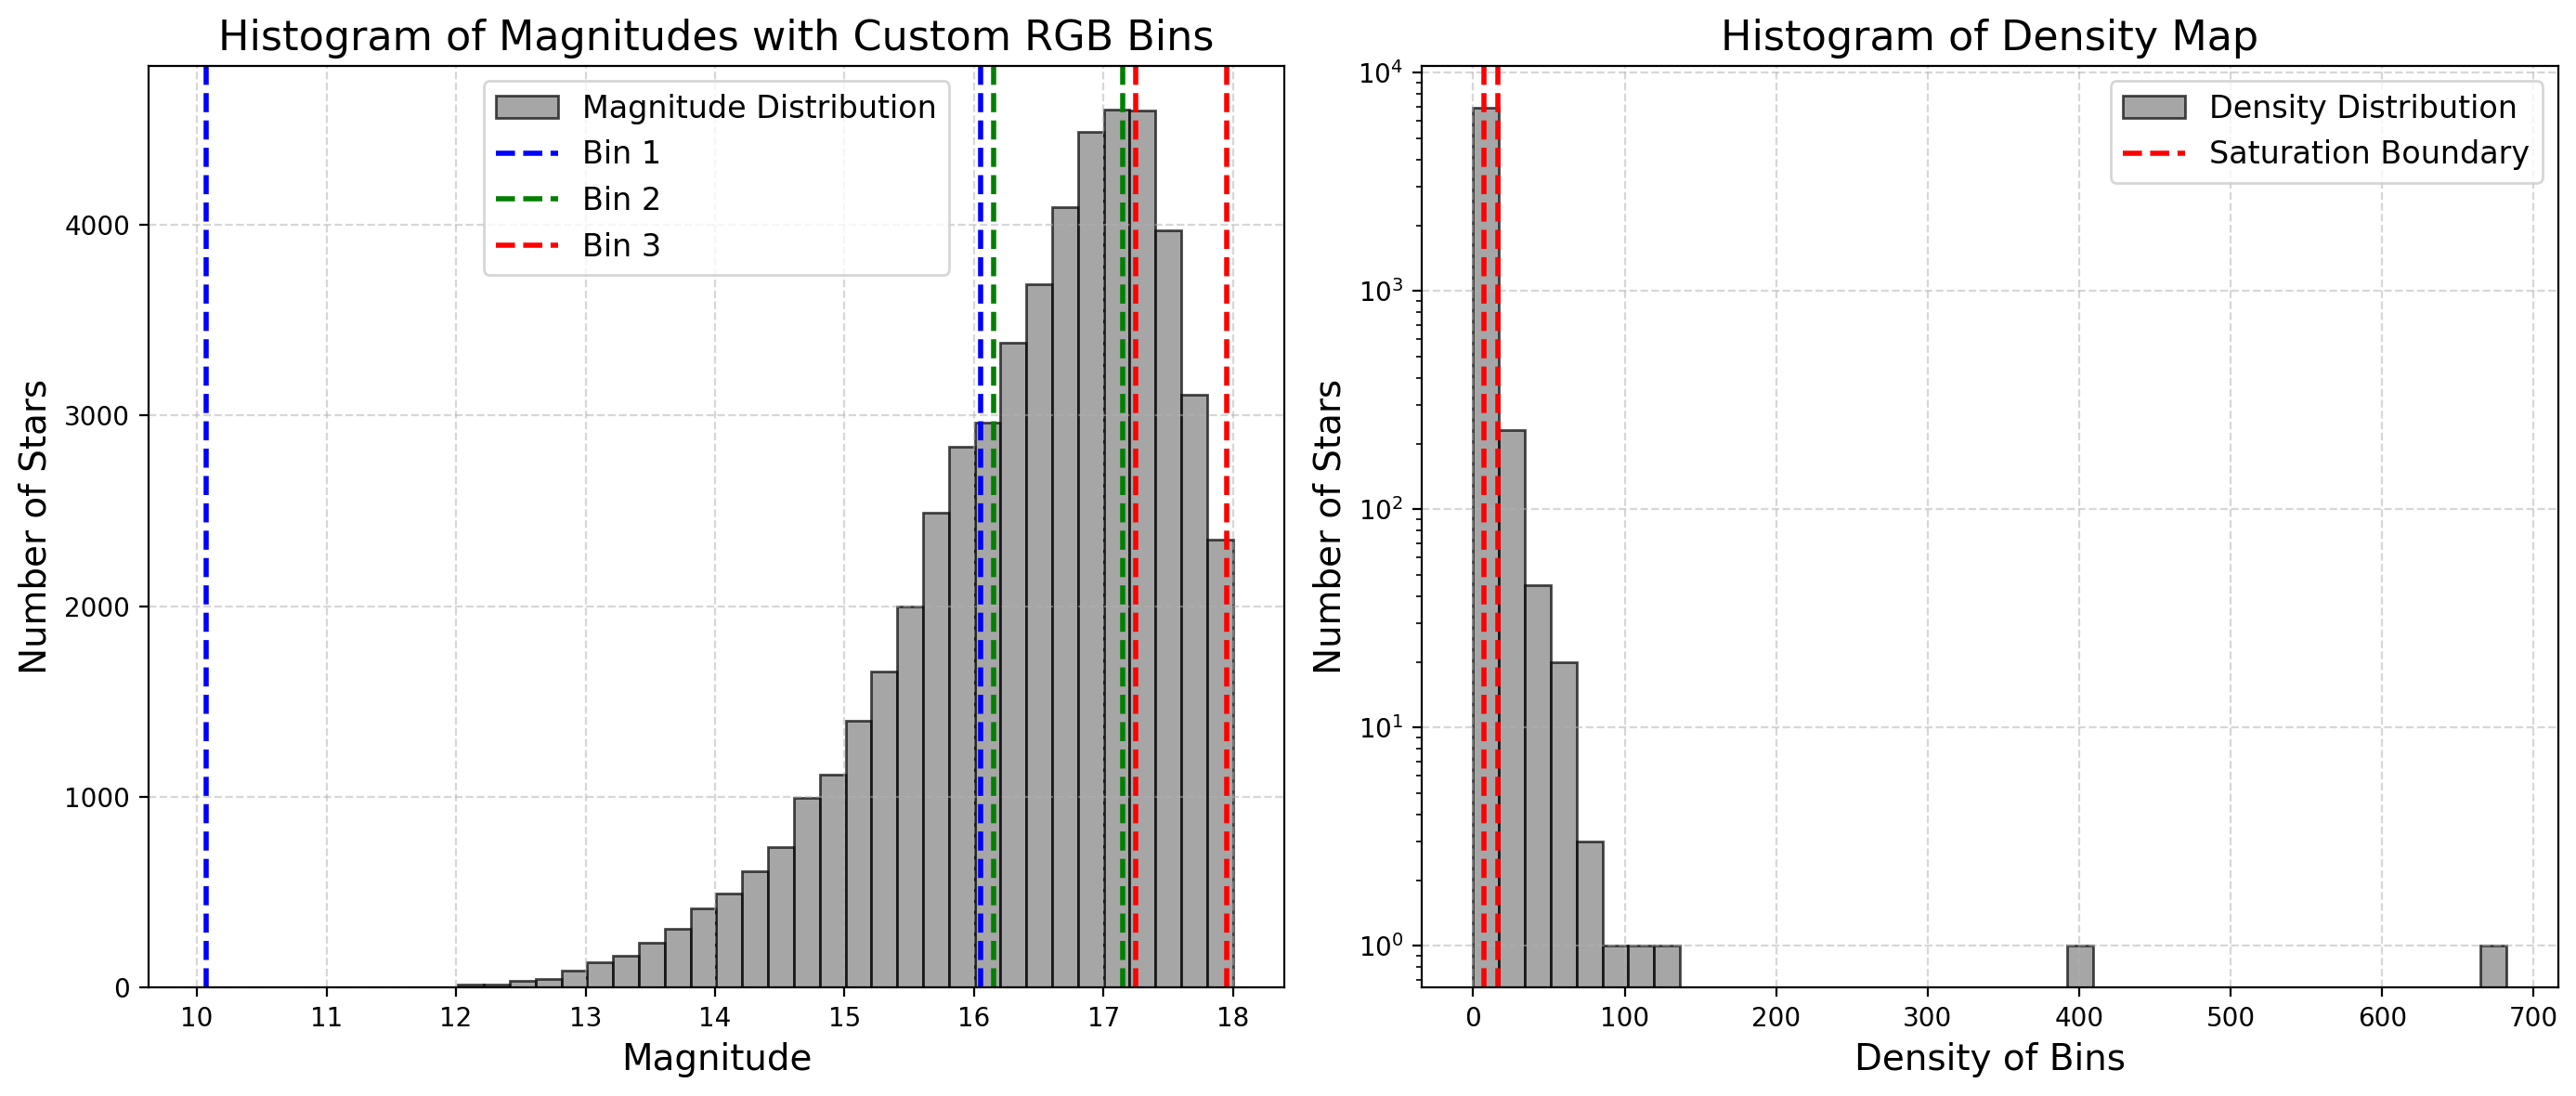

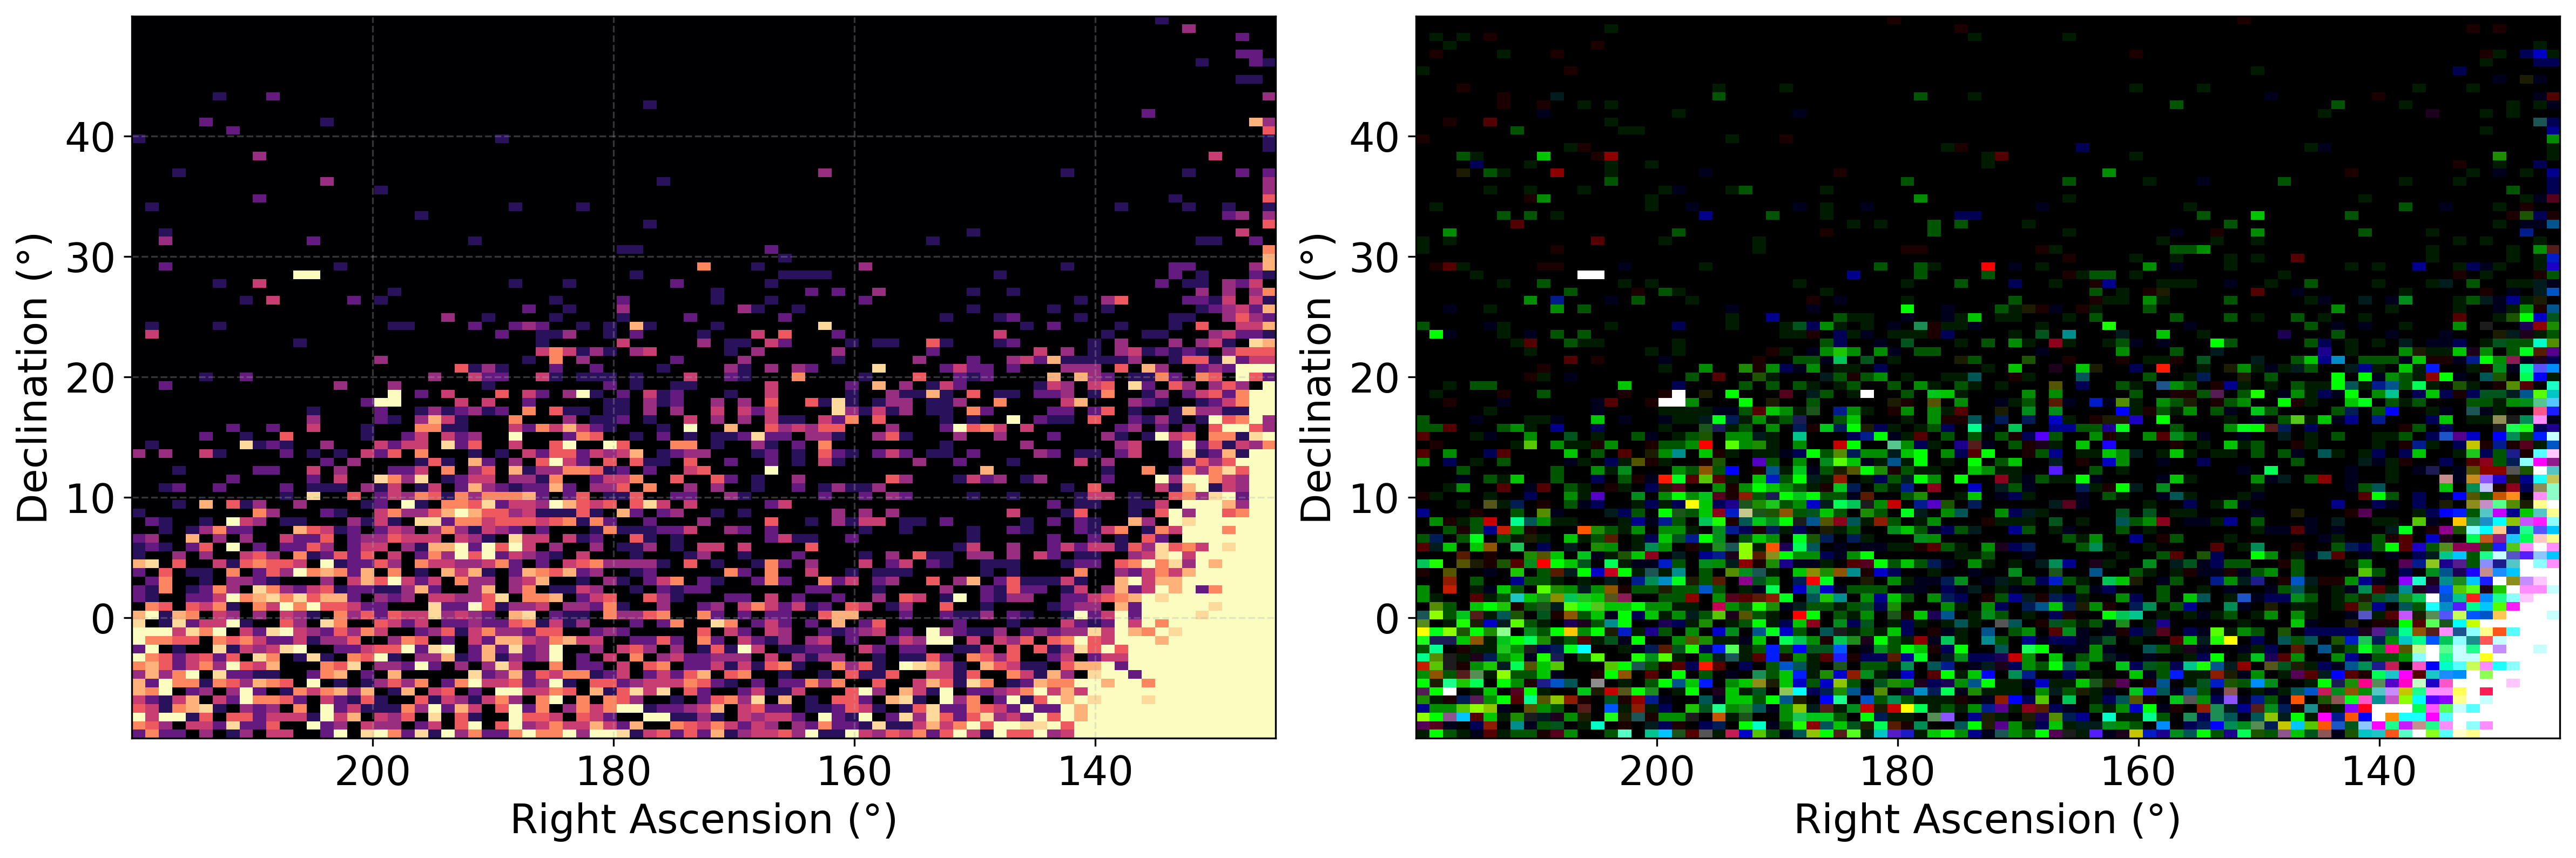

In [251]:
plot_sky_density_FS(fs_filtered, bins=85, contrast = (60,95), binning_method=(16.1,17.2), cmap_density="magma", density_bins = 40 , log_scale=True)

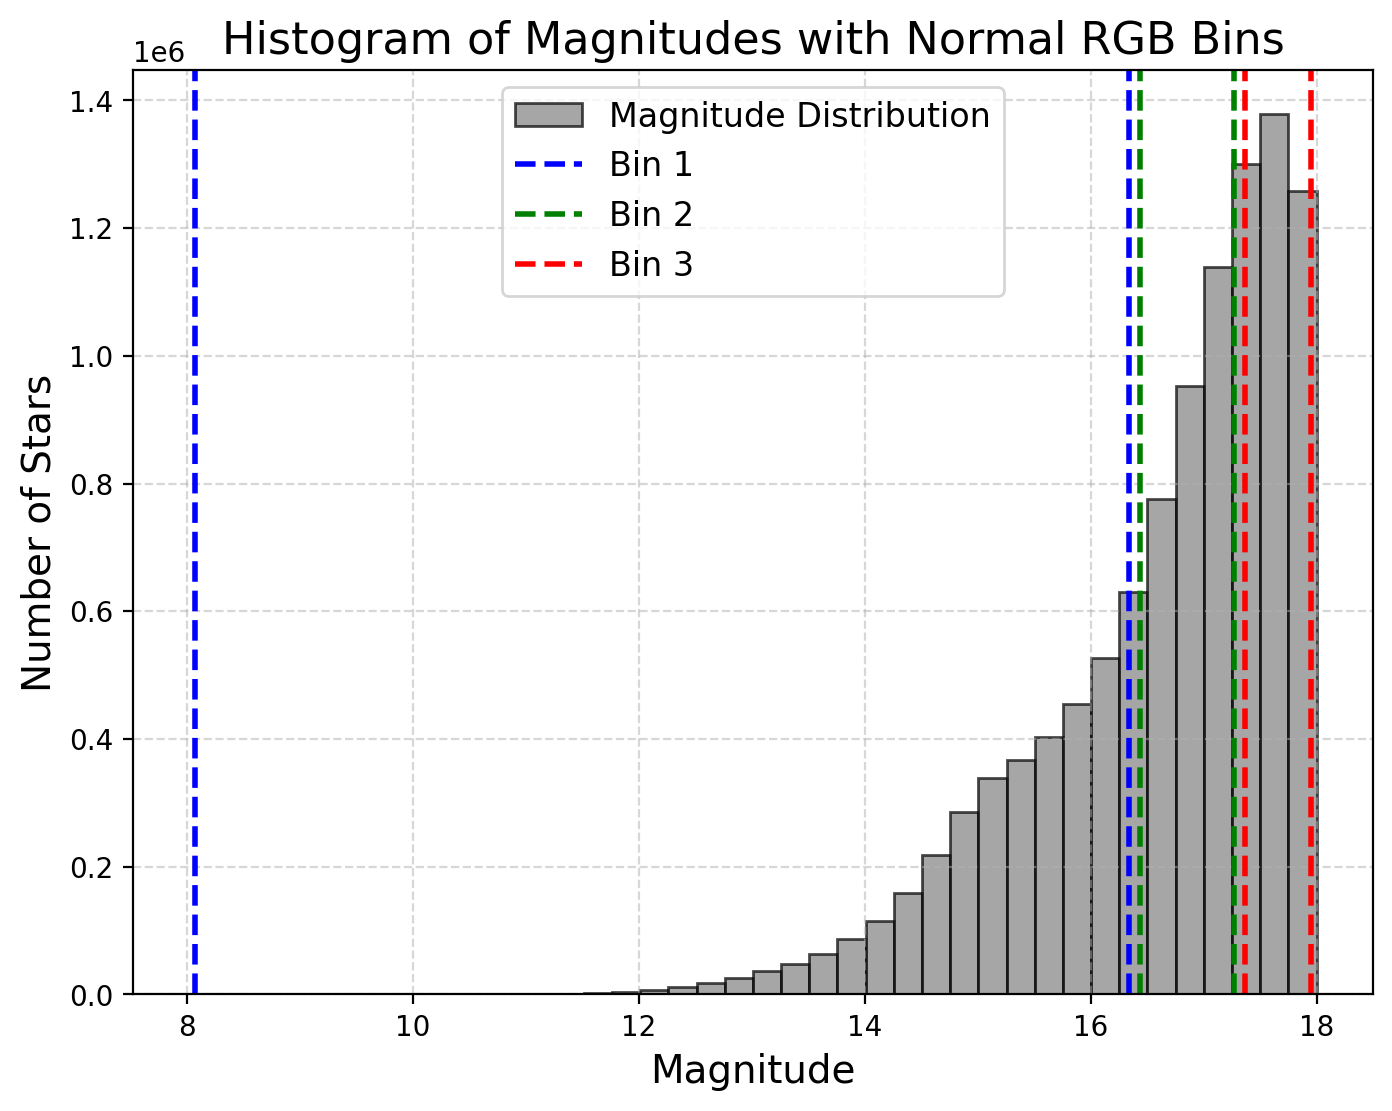

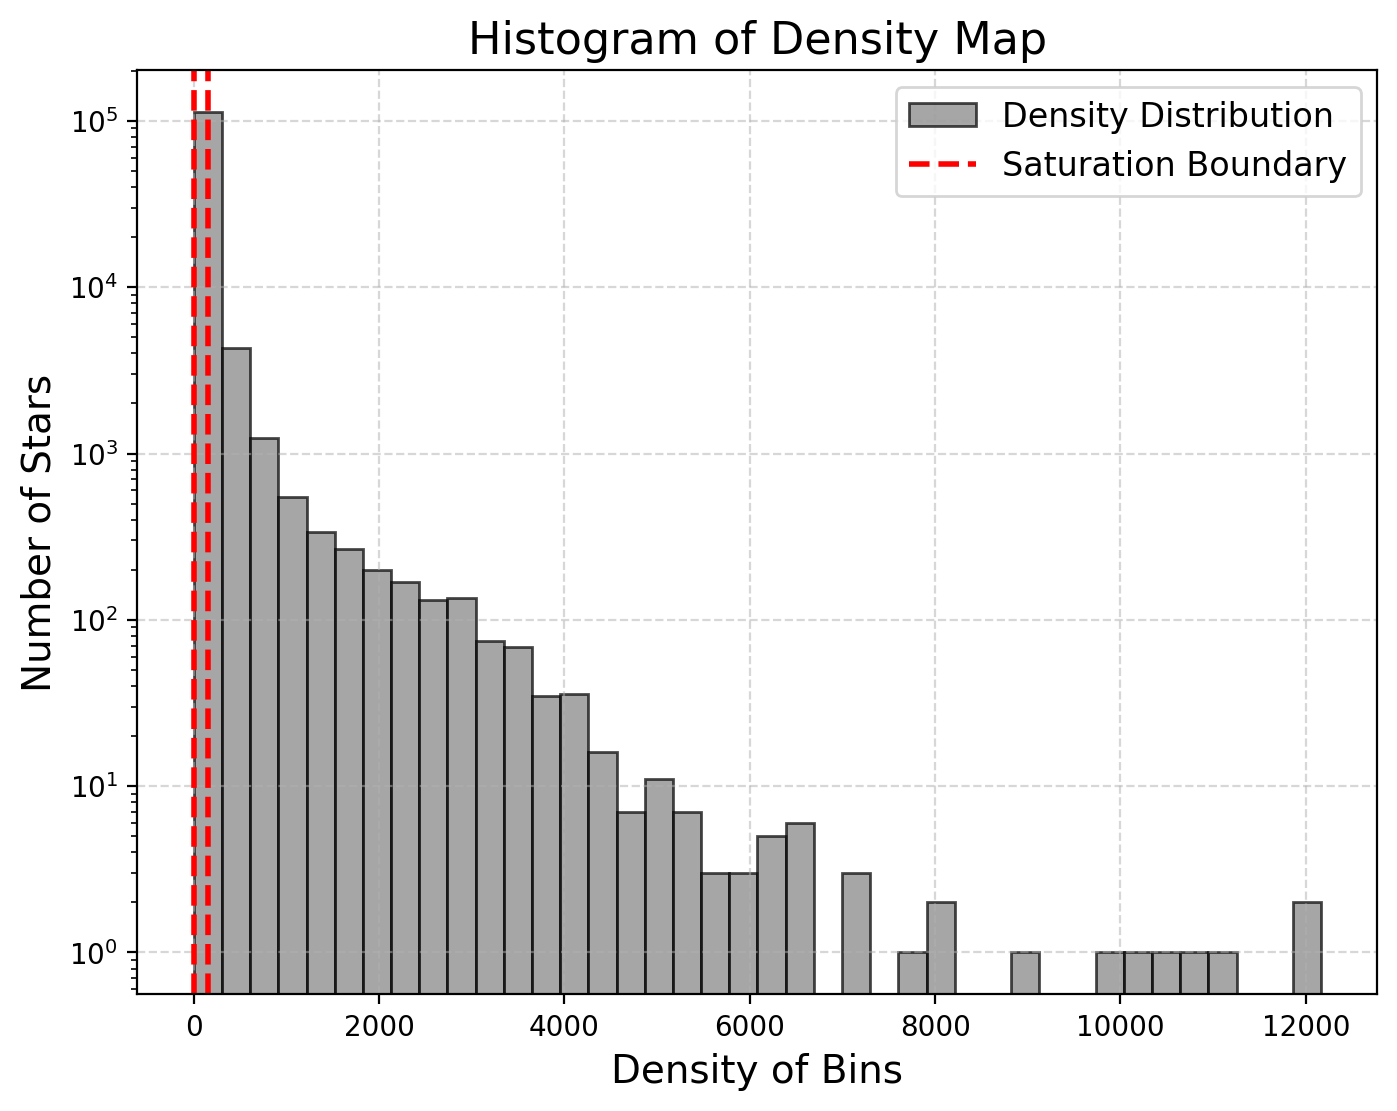

2025-03-19 01:18:22,851 - INFO - 0.0 180.0 -180.0 180.0
2025-03-19 01:18:22,851 - INFO - The interval between parallels is 30 deg -0.00'.
2025-03-19 01:18:22,852 - INFO - The interval between meridians is 30 deg -0.00'.


<Figure size 2000x1200 with 0 Axes>

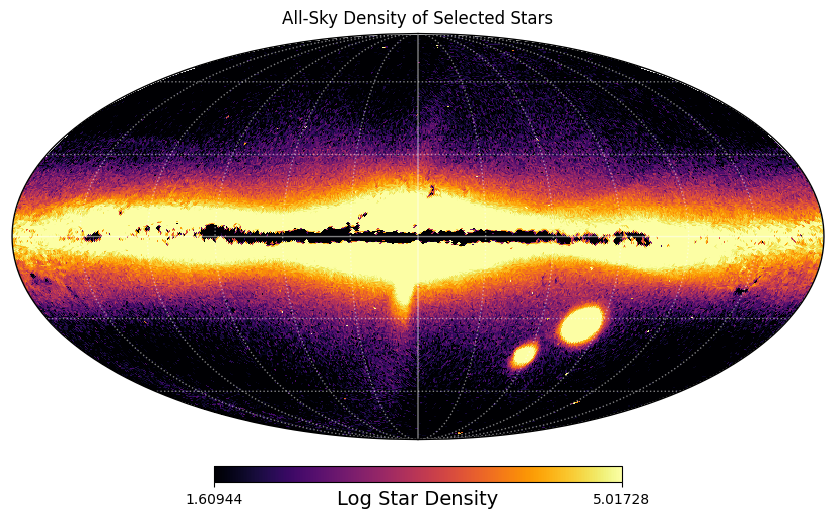

<Figure size 2000x1200 with 0 Axes>

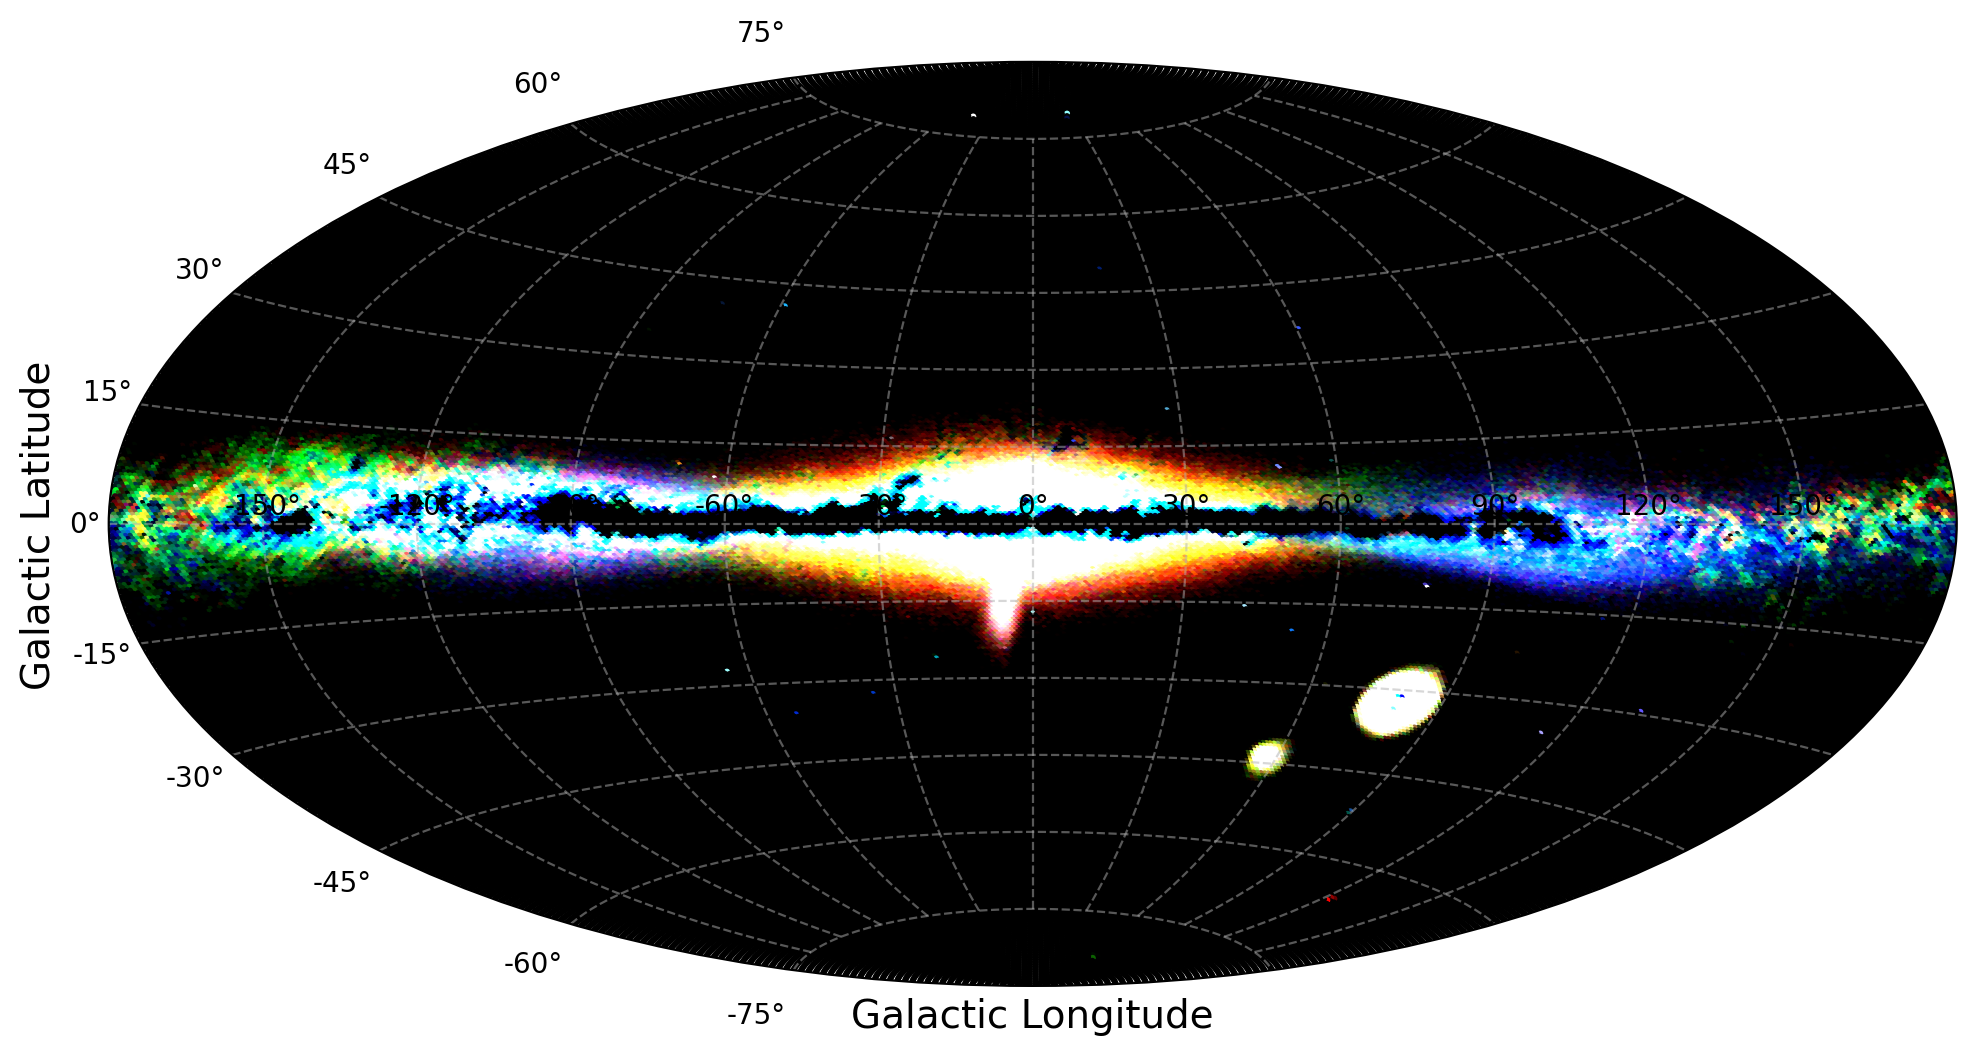

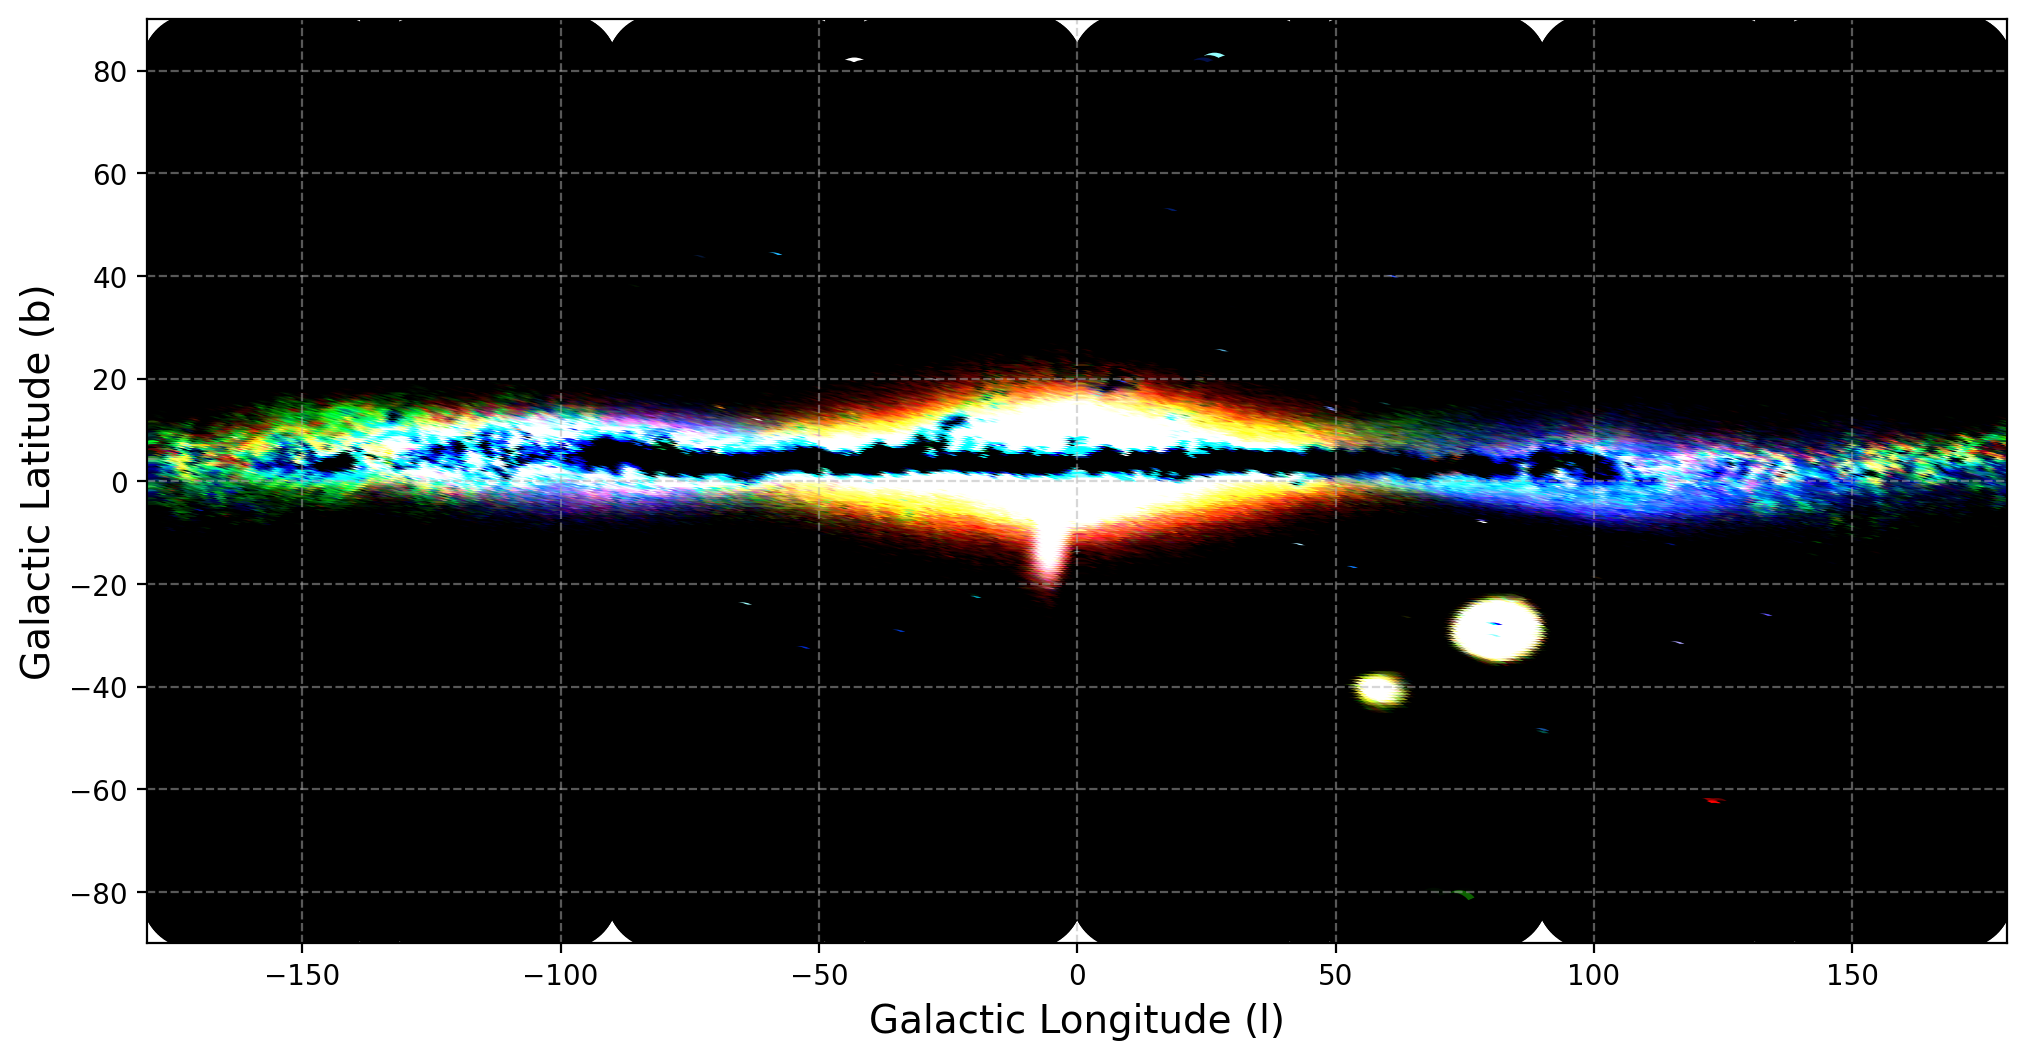

In [252]:
plot_sky_density_healpy(all_sky, nside=100, contrast=(80, 93), vmin =4 , vmax = 150, binning_method='normal', 
                             cmap_density="inferno", cmap_rgb="plasma", log_scale=True)